In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Weather.csv")

In [7]:
data

,Outlook,Temp,Humidity,Windy,Play,Unnamed: 5
0,Rainy,Hot,High,f,no,NaN
1,Rainy,Hot,High,t,no,NaN
2,Overcast,Hot,High,f,yes,NaN
3,Sunny,Mild,High,f,yes,NaN
4,Sunny,Cool,Normal,f,yes,NaN
5,Sunny,Cool,Normal,t,no,NaN
6,Overcast,Cool,Normal,t,yes,NaN
7,Rainy,Mild,High,f,no,NaN
8,Rainy,Cool,Normal,f,yes,NaN
9,Sunny,Mild,Normal,f,yes,NaN


In [8]:
data.head()

,Outlook,Temp,Humidity,Windy,Play,Unnamed: 5
0,Rainy,Hot,High,f,no,NaN
1,Rainy,Hot,High,t,no,NaN
2,Overcast,Hot,High,f,yes,NaN
3,Sunny,Mild,High,f,yes,NaN
4,Sunny,Cool,Normal,f,yes,NaN


In [9]:
data.info

<bound method DataFrame.info of      Outlook  Temp Humidity Windy Play  Unnamed: 5
0      Rainy   Hot     High     f   no         NaN
1      Rainy   Hot     High     t   no         NaN
2   Overcast   Hot     High     f  yes         NaN
3      Sunny  Mild     High     f  yes         NaN
4      Sunny  Cool   Normal     f  yes         NaN
5      Sunny  Cool   Normal     t   no         NaN
6   Overcast  Cool   Normal     t  yes         NaN
7      Rainy  Mild     High     f   no         NaN
8      Rainy  Cool   Normal     f  yes         NaN
9      Sunny  Mild   Normal     f  yes         NaN
10     Rainy  Mild   Normal     t  yes         NaN
11  Overcast  Mild     High     t  yes         NaN
12  Overcast   Hot   Normal     f  yes         NaN
13     Sunny  Mild     High     t   no         NaN>

In [10]:
data.isnull().sum()

Outlook        0
Temp           0
Humidity       0
Windy          0
Play           0
Unnamed: 5    14
dtype: int64

In [11]:
df=data.drop(['Unnamed: 5'],axis=1)

In [12]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


In [13]:
import pandas_profiling as pp

In [14]:
pp.ProfileReport(df)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
lb = LabelEncoder()

In [18]:
x = df[['Outlook','Temp','Humidity','Windy']]
x

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,f
1,Rainy,Hot,High,t
2,Overcast,Hot,High,f
3,Sunny,Mild,High,f
4,Sunny,Cool,Normal,f
5,Sunny,Cool,Normal,t
6,Overcast,Cool,Normal,t
7,Rainy,Mild,High,f
8,Rainy,Cool,Normal,f
9,Sunny,Mild,Normal,f


In [19]:
y = df['Play']
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10, 4), (4, 4), (10,), (4,))

In [22]:
from sklearn.naive_bayes import BernoulliNB,BaseDiscreteNB

In [23]:
bnb = BernoulliNB()

In [24]:
bnb.fit(x_train,y_train)

ValueError: could not convert string to float: 'Rainy'

In [130]:
yhat = bnb.predict(x_test)
yhat

array([0, 1, 1, 1])

In [131]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score,plot_roc_curve

In [132]:
cm = confusion_matrix(y_test,yhat)
cm

array([[0, 1],
       [1, 2]], dtype=int64)

In [133]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [134]:
accuracy_score(y_test,yhat)

0.5

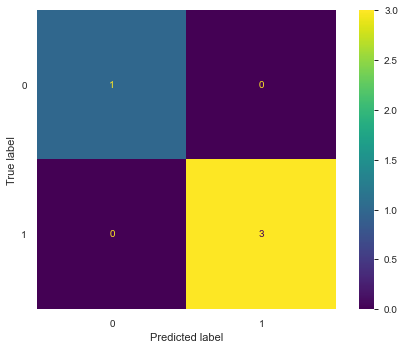

In [135]:
plot_confusion_matrix(bnb,x_test,yhat)

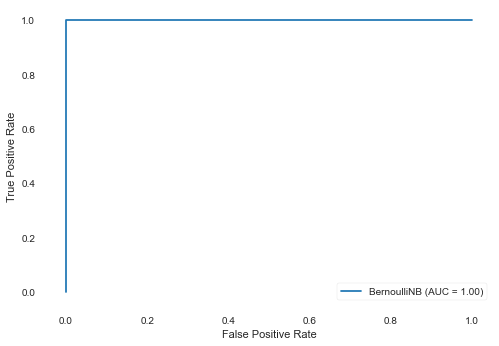

In [136]:
plot_roc_curve(bnb,x_test,yhat)

In [137]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB,CategoricalNB,GaussianNB

In [138]:
mnb = MultinomialNB()

In [139]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [140]:
mnb_yhat = mnb.predict(x_test)

In [141]:
mnb_yhat

array([1, 1, 1, 1])

In [142]:
cm1 = confusion_matrix(y_test,mnb_yhat)

In [143]:
cm1

array([[0, 1],
       [0, 3]], dtype=int64)

In [144]:
print (classification_report(y_test,mnb_yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
accuracy_score(y_test,mnb_yhat)

0.75

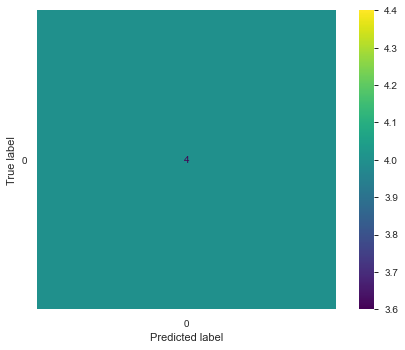

In [146]:
plot_confusion_matrix(mnb,x_test,mnb_yhat)

c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


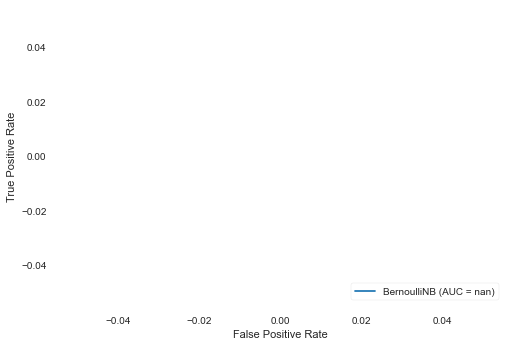

In [147]:
plot_roc_curve(bnb,x_test,mnb_yhat)

In [148]:
cnb = ComplementNB()

In [149]:
cnb.fit(x_train,y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [150]:
cnb_yhat = cnb.predict(x_test)

In [151]:
cnb_yhat

array([1, 0, 1, 1])

In [152]:
cm2  = confusion_matrix(y_test,cnb_yhat)

In [153]:
cm2

array([[0, 1],
       [1, 2]], dtype=int64)

In [154]:
print(classification_report(y_test,cnb_yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [155]:
accuracy_score(y_test,cnb_yhat)

0.5

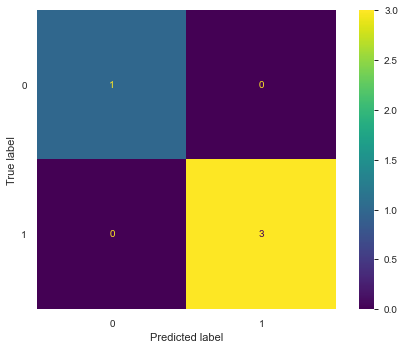

In [156]:
plot_confusion_matrix(cnb,x_test,cnb_yhat)

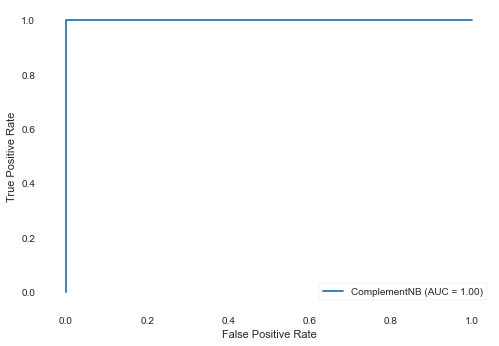

In [157]:
plot_roc_curve(cnb,x_test,cnb_yhat)

In [158]:
ct = CategoricalNB()

In [159]:
ct.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
ct_yhat = ct.predict(x_test)

In [161]:
ct_yhat

array([0, 1, 1, 1])

In [162]:
cm3 = confusion_matrix(y_test,ct_yhat)

In [163]:
cm3

array([[0, 1],
       [1, 2]], dtype=int64)

In [164]:
accuracy_score(y_test,ct_yhat)

0.5

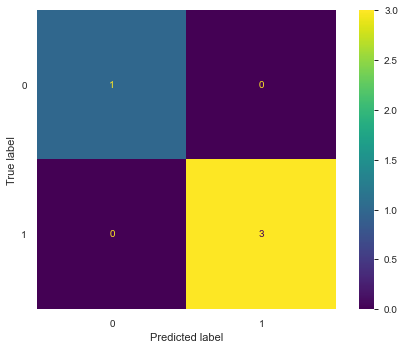

In [165]:
plot_confusion_matrix(ct,x_test,ct_yhat)

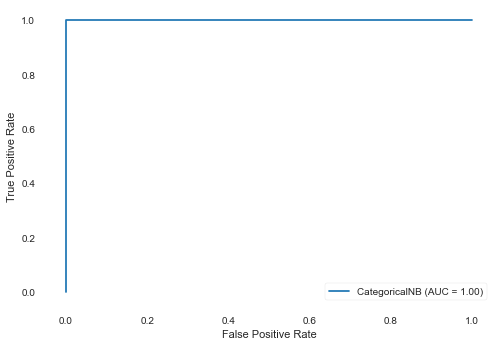

In [166]:
plot_roc_curve(ct,x_test,ct_yhat)

In [167]:
gnb = GaussianNB()

In [168]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [169]:
gnb_yhat = gnb.predict(x_test)

In [170]:
gnb_yhat

array([0, 1, 1, 1])

In [171]:
cm4 = confusion_matrix(y_test,gnb_yhat)

In [172]:
cm4

array([[0, 1],
       [1, 2]], dtype=int64)

In [173]:
accuracy_score(y_test,gnb_yhat)

0.5

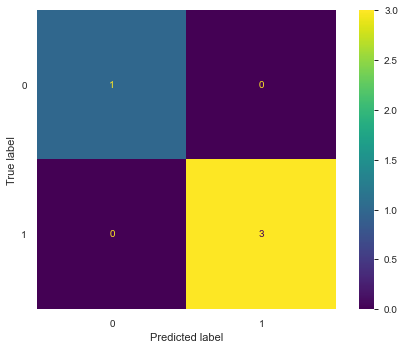

In [174]:
plot_confusion_matrix(gnb,x_test,gnb_yhat)

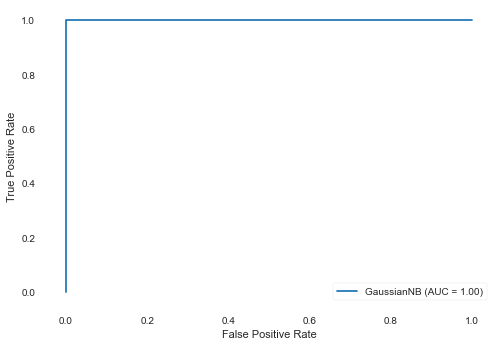

In [175]:
plot_roc_curve(gnb,x_test,gnb_yhat)

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
pd.DataFrame({"BernoulliNB":accuracy_score(y_test,yhat),
              "MultinomialNB":accuracy_score(y_test,mnb_yhat),
              "CategoricalNB":accuracy_score(y_test,ct_yhat),
              "ComplementNB":accuracy_score(y_test,cnb_yhat),
              "GaussianNB":accuracy_score(y_test,gnb_yhat)},index=["Accuracy_score"])

,BernoulliNB,MultinomialNB,CategoricalNB,ComplementNB,GaussianNB
Accuracy_score,0.5,0.75,0.5,0.5,0.5


In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
DTC = DecisionTreeClassifier()

In [180]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [181]:
dtc_yhat = DTC.predict(x_test)

In [211]:
dtc_yhat

array([0, 1, 0, 1])

In [214]:
cm = confusion_matrix(y_test,dtc_yhat)
cm

array([[1, 1],
       [1, 1]], dtype=int64)

In [215]:
print(classification_report(y_test,dtc_yhat))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [188]:
importance = DTC.feature_importances_

Feature: 0, Score: 0.45139
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.20833
Feature: 3, Score: 0.34028


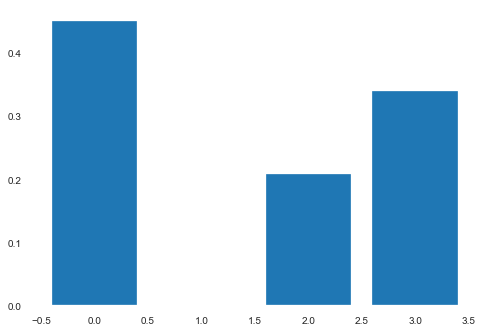

In [184]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [185]:
from sklearn import tree

[Text(247.99999999999997, 269.082, 'X[3] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(148.79999999999998, 209.286, 'X[0] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(99.19999999999999, 149.49, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(49.599999999999994, 89.69399999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.79999999999998, 89.69399999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(99.19999999999999, 29.897999999999968, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(198.39999999999998, 29.897999999999968, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(198.39999999999998, 149.49, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(347.19999999999993, 209.286, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(297.59999999999997, 149.49, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(396.79999999999995, 149.49, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

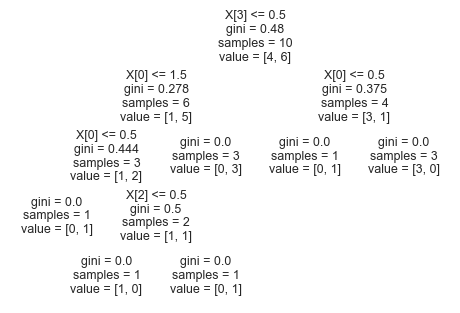

In [186]:
tree.plot_tree(DTC)

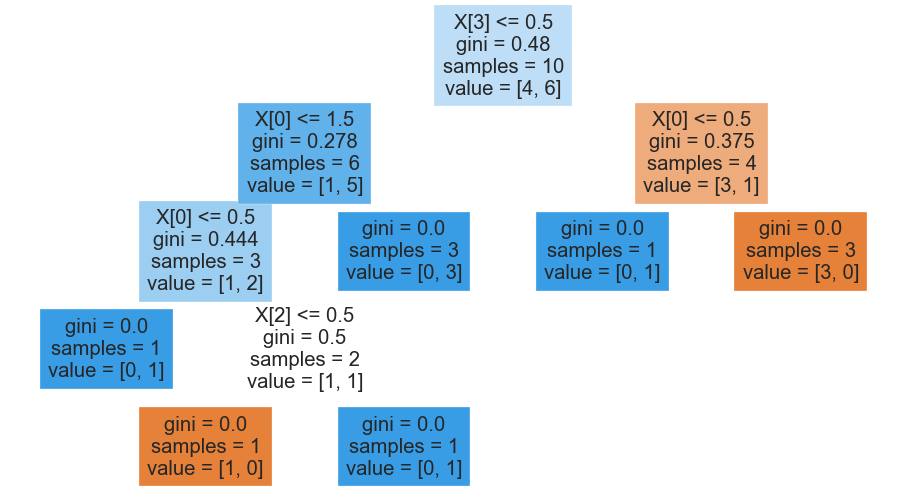

In [187]:
plt.figure(figsize=(16,9))
tree.plot_tree(DTC,filled=True)
plt.show()

In [201]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [202]:
a = df.drop(["Temp","Play","Windy"],axis=1)
a

,Outlook,Humidity
0,1,0
1,1,0
2,0,0
3,2,0
4,2,1
5,2,1
6,0,1
7,1,0
8,1,1
9,2,1


In [203]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int32

In [204]:
x_train,x_test,y_train,y_test = train_test_split(a,y)

In [205]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [206]:
DTC.feature_importances_

array([0.81395349, 0.18604651])

In [207]:
DTC_yhat = DTC.predict(x_test)

In [208]:
cm = confusion_matrix(y_test,DTC_yhat)

In [209]:
cm

array([[1, 1],
       [0, 2]], dtype=int64)

In [210]:
print(classification_report(y_test,DTC_yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

